In [1]:
%pylab qt
from scipy.integrate import solve_ivp
from IPython import display
import time
import scipy.integrate as integrate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


### euler method

In [2]:
# define domain and lattice
length = 30.0
Lmax = length 
Lmin = -5
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)


nus = ones(1)*1.0
#nus = array([0.01,0.1,0.5,1.0,5.0,10.0])
nu_n = len(nus)
a0s = array([0.01,0.1,0.5,1.0,5.0,10.0,50.0,100.0])
a0s = ones(1)*1.0

a0_n = len(a0s)



vs0 = []
xps0 = []
burns0 = []
wake0 = []
for a0 in a0s:
    vs1 = []
    xps1 = []
    burns1 = []
    wake1 = []
    for nu in nus:
        print(a0,nu)

        xp = 0.0
        tf = 400.0
        Ac = zeros(Nx)
        As = zeros(Nx) 
        As[xs > xp] = a0
        dt = 0.001
        t_max = int(tf/dt)

        vs2 = []
        xps2 = []
        burns2 = []
        ct = 0 
        fig, axs = subplots(1,5,figsize = (20,3),sharey = True)
        for t in range(t_max):
            total_f = trapz(-(xp -xs) * Ac, x=xs)
            binding = exp(-0.5 * (xp - xs) ** 2) * As
            burnt = nu * Ac
            Ac += (binding - burnt) *dt
            As += (- binding) * dt

            xp += total_f * dt
            
            if ct > 4:
                show()
            if t in [0,2000,4000,6000,60000]:

                #display.clear_output(wait=True)
                #cla()
                
                axs[ct].plot(xs,As)
                axs[ct].plot(xs,Ac)
                #ylabel("Concentration")
                #xlabel("Position")
                axs[ct].set_xticklabels([0,0,10,20,30], fontsize = 16)
                if t > 0:
                    axs[ct].axvline(xp,c = "tab:green")
                    
                if ct == 0:
                    axs[ct].set_title("$a_{tot}$ = " +str(a0)+ r" $\nu'$ = "+str(nu))
                    axs[ct].set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0], fontsize = 16)
                axs[ct].text(5,a0*0.5,"t = " +str(t*dt), fontsize = 16)

                #display.display(gcf())
                ct += 1
            
            vs2.append(total_f)
            xps2.append(xp)
            burns2.append(trapz(burnt,x=xs))
            if abs(xp-length) < 5:
                break
        '''plot(xs,As,label = r"$a_s$")
        plot(xs,Ac, label = r"$a_c$")
        ylim(1e-8,1e2)
        axvline(xp,c = "tab:green")
        #axvline(xp*0.75)
        text(5,a0*0.1,r"$a_{tot}$ = " +str(round(a0,3))+r" $\nu'$= "+str(round(nu,3)),fontsize=16)
        yscale("log")
        ylabel("Concentration")
        xlabel("Position")
        legend()
        
        show()
        plot(xs,As,label = r"$a_s$")
        plot(xs,Ac, label = r"$a_c$")
        #text(5,a0*0.9,r"$a_{tot}$ = " +str(round(a0,3))+r" $\nu'$= "+str(round(nu,3)),fontsize=16)
        axvline(xp,c = "tab:green",label = r"$x_p$")
        legend(loc=(1.1,0.0),fontsize=16)
        #axvline(xp*0.75)
        #text(5,a0*0.5,"t = " +str(t*dt))
        
        ylabel("Concentration",fontsize=16)
        xlabel("Position",fontsize=16)
        plt.xtick(fontsize=16)
        plt.yticks(fontsize=16)'''
        show()
        vs1.append(vs2)
        xps1.append(xps2)
        burns1.append(burns2)  
        wake1.append(As[int((-Lmin+xp)*0.75/dx)])
        

    vs0.append(vs1)
    xps0.append(xps1)
    burns0.append(burns1)
    wake0.append(wake1)
    
    



1.0 1.0


<ipython-input-2-12c6883df25a>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct].set_xticklabels([0,0,10,20,30], fontsize = 16)
<ipython-input-2-12c6883df25a>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct].set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0], fontsize = 16)
<ipython-input-2-12c6883df25a>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct].set_xticklabels([0,0,10,20,30], fontsize = 16)
<ipython-input-2-12c6883df25a>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct].set_xticklabels([0,0,10,20,30], fontsize = 16)
<ipython-input-2-12c6883df25a>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct].set_xticklabels([0,0,10,20,30], fontsize = 16)
<ipython-input-2-12c6883df25a>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct].set_xticklabels([0,0,10,20,30]

1.0 0.1
-0.9704750210476646 1.1343423657070315 0.16386734465936692
1.0 0.12589254117941673
-0.8396903569448446 1.0324759410108895 0.19278558406604485
1.0 0.15848931924611134
-0.711064971748216 0.9358222688491658 0.22475729710094972
1.0 0.19952623149688797
-0.5858509959849119 0.8449502048957073 0.2590992089107954
1.0 0.251188643150958
-0.46575286734215093 0.7602965929540718 0.2945437256119209
1.0 0.31622776601683794
-0.3530383061325162 0.6820335953720776 0.32899528923956145
1.0 0.3981071705534973
-0.2505827972286244 0.6099110000656757 0.35932820283705125
1.0 0.5011872336272724
-0.16188148477934555 0.5430508841935007 0.3811693994141551
1.0 0.6309573444801934
-0.09080525693840256 0.47962940121190134 0.38882414427349876
1.0 0.7943282347242815
-0.04064701732493848 0.4163866565970905 0.37573963927215204
1.0 1.0
-0.012270971118462677 0.348096099218776 0.3358251281003133
1.0 1.2589254117941675
-0.0016821911095260633 0.26814937890794566 0.2664671877984196
1.0 1.584893192461114
-3.37584062473913

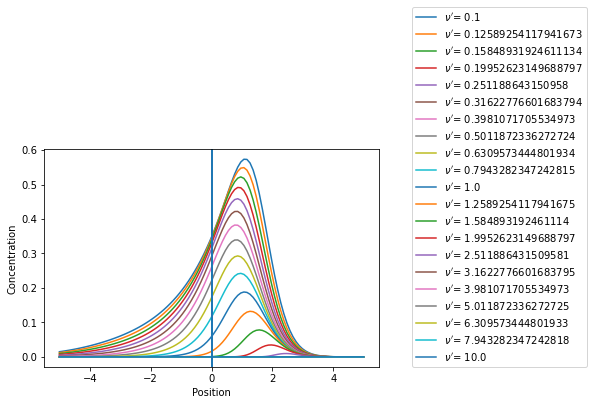

In [27]:
def linear(x,m,b):
    return m*x + b

# define domain and lattice
length = 15.0
Lmax = length 
Lmin = -5
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)


nus = array([0.1,0.25,0.5,1.0,2.5,5.0,10.0])[:-3]
nus = logspace(-1,1,21,base = 10)
nu_n = len(nus)
a0s = logspace(0,1,3,base = 10)
a0s = ones(1)*1.0
a0_n = len(a0s)


for a0 in a0s:
    fronts = []
    tails = []
    for nu in nus:
        print(a0,nu)

        xp = 0.0
        tf = 1000.0
        Ac = zeros(Nx)
        As = zeros(Nx) 
        As[xs > xp] = a0
        dt = 0.001
        t_max = int(tf/dt)

        #fig, axs = subplots(1,5,figsize = (15,3))
        for t in range(t_max):
            total_f = trapz(-(xp -xs) * Ac, x=xs)
            binding = exp(-0.5 * (xp - xs) ** 2) * As
            burnt = nu * Ac
            Ac += (binding - burnt) *dt
            As += (- binding) * dt

            xp += total_f * dt

            if abs(xp-length) < 5:
                break
 
        xp_index = int((xp+5)/dx)
        scan = 50
        x = xs[xp_index-scan:xp_index+scan]
        x = linspace(-scan*dx,scan*dx,int(2*scan))
        y = Ac[xp_index-scan:xp_index+scan]
        plot(x,y, label = r"$\nu'$= "+ str(nu))
        axvline(0.0)
        legend(loc=(1.1,0.0))
        
        
        ylabel("Concentration")
        xlabel("Position")
        tail = trapz((xs[:xp_index]-xp)*Ac[:xp_index],x = xs[:xp_index])
        front = trapz((xs[xp_index:]-xp)*Ac[xp_index:],x = xs[xp_index:])
        print(tail,front,front+tail)
        tails.append(tail)
        fronts.append(front)
    
fronts = array(fronts)
tails = array(tails)



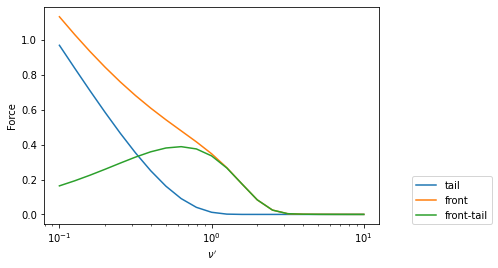

In [36]:
fronts = array(fronts)
tails = array(tails)
plot(nus,-tails,label = "tail")
plot(nus,fronts,label = "front")
plot(nus,fronts+tails,label = "front-tail")
xscale('log')
xlabel(r"$\nu'$")
ylabel("Force")
legend(loc = (1.1,0.0))

### plotting

<ipython-input-36-e4d57639b91b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(["0.0","0.0","0.1","0.2","0.3","0.4","0.5","0.6"],fontsize = 16)
<ipython-input-36-e4d57639b91b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(["0.0","0.0","0.1","0.2","0.3","0.4","0.5","0.6"],fontsize = 16)
<ipython-input-36-e4d57639b91b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(["0.0","0.0","0.1","0.2","0.3","0.4","0.5","0.6"],fontsize = 16)
<ipython-input-36-e4d57639b91b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(["0.0","0.0","0.1","0.2","0.3","0.4","0.5","0.6"],fontsize = 16)
<ipython-input-36-e4d57639b91b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(["0.0","0.0","0.1","0.2","0.3","0.4","0.5","0.6"],fontsize =

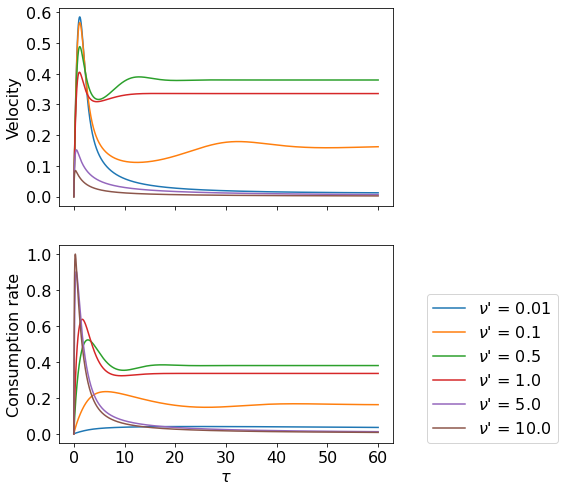

In [36]:
for i in [0]:
    fig, axs = subplots(2,1,sharex = "col",figsize = (6,8))
    #axs[0].set_title("$a_{tot}$: " +str(a0s[i]))
    for j in range(0,nu_n):
        tmax = len(vs0[i][j])
        ts = linspace(0,tmax*dt,tmax)
        indmax = 60000
        axs[0].plot(ts[:indmax],vs0[i][j][:indmax])
        axs[1].plot(ts[:indmax],burns0[i][j][:indmax],label = r"$\nu$' = "+str(round(nus[j],3)))
        axs[1].legend(loc = (1.1,0), fontsize = 16)
        axs[1].set_xlabel(r"$\tau$",fontsize = 16)
        axs[0].set_ylabel("Velocity",fontsize=16)
        axs[0].set_yticklabels(["0.0","0.0","0.1","0.2","0.3","0.4","0.5","0.6"],fontsize = 16)
        axs[1].set_ylabel("Consumption rate",fontsize=16)
        xticks(fontsize = 16)
        yticks(fontsize = 16)
    show()

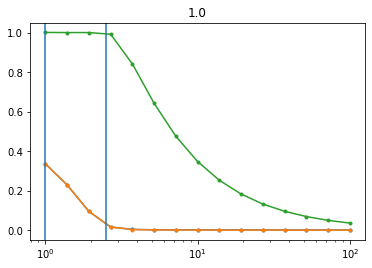

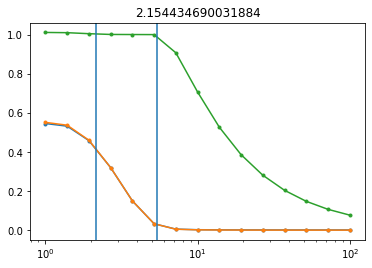

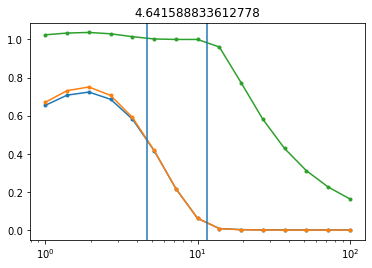

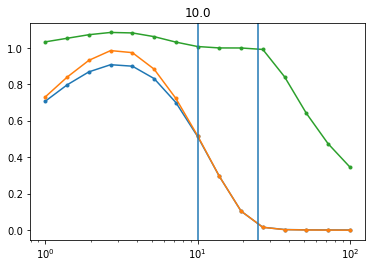

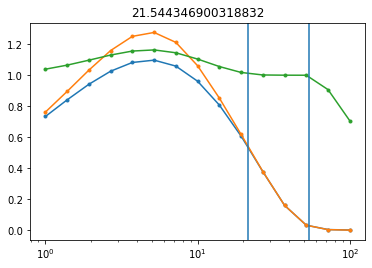

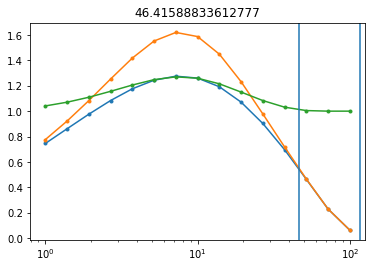

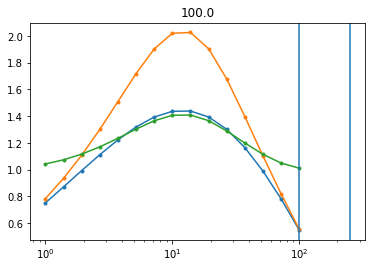

In [21]:

for i in range(a0_n):
    ratio = []
    vs = []
    burns = []
    for j in range(nu_n):
        ratio.append(vs0[i][j][-1]*a0s[i]/(burns0[i][j][-1]))
        vs.append(vs0[i][j][-1])
        burns.append(burns0[i][j][-1])
    title(a0s[i])
    plot(nus,burns/a0s[i],".-")
    plot(nus,vs,".-")
    plot(nus,ratio, ".-")
    xscale("log")
    axvline(a0s[i])
    axvline(a0s[i]*2.5)
    #yscale("log")
    show()
    

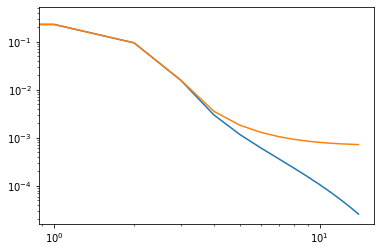

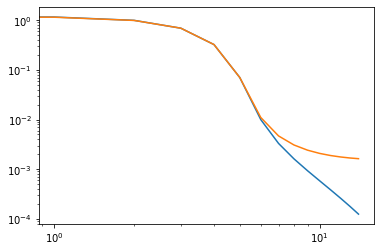

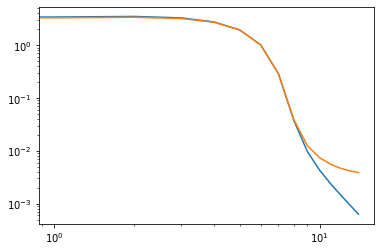

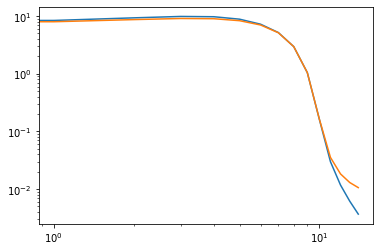

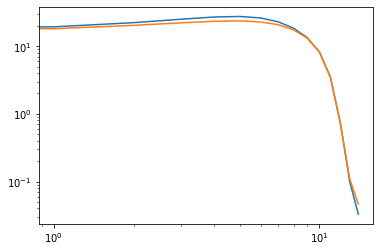

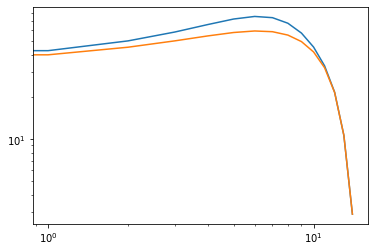

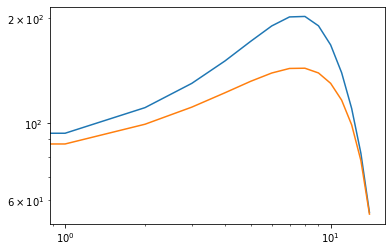

In [42]:
for i in range(a0_n):
    vs = []
    burns = []
    for j in range(nu_n):
        vs.append(vs0[i][j][-1])
        burns.append(burns0[i][j][-1])
    #plot(vs,burns,".-")
    #plot(array(vs)*a0s[i],burns)
    plot(array(vs)*a0s[i])
    plot(burns)
    xscale('log')
    yscale('log')
    show()
    

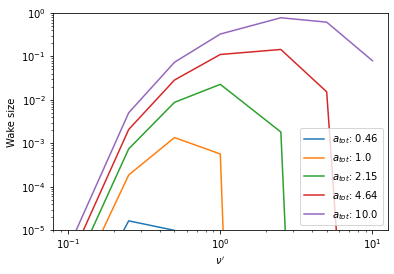

In [28]:
for i in range(2,a0_n):
    plot(nus,wake0[i], label  = "$a_{tot}$: "+ str(round(a0s[i],2)))
    xlabel(r"$\nu'$")
    ylabel("Wake size")
    xscale("log")
    yscale("log")
    ylim(1e-5,1.0)
legend()